In [18]:
import cv2
import numpy as np
from tqdm import tqdm
from PIL import Image
from matplotlib import pyplot as plt

In [50]:
import cv2
import numpy as np

def extract_patches(image, patch_size=5, stride=1):
    height, width = image.shape[:2]
    patches = []
    for y in range(0, height - patch_size + 1, stride):
        for x in range(0, width - patch_size + 1, stride):
            patch = image[y:y + patch_size, x:x + patch_size]
            patches.append(patch)
    return np.array(patches)

def calculate_features(patch):
    gray_patch = cv2.cvtColor(patch, cv2.COLOR_BGR2GRAY)
    mean_color = np.mean(gray_patch)
    std_dev = np.std(gray_patch)
    return mean_color, std_dev

def style_transfer(content_img, style_img, patch_size=5, stride=1):
    content_patches = extract_patches(content_img, patch_size, stride)
    style_patches = extract_patches(style_img, patch_size, stride)

    result_img = np.zeros_like(content_img)
    height, width = content_img.shape[:2]
    patch_h, patch_w = patch_size, patch_size

    print(f"Patch count\t content: {len(content_patches)} style: {len(style_patches)}")

    for i, content_patch in enumerate(content_patches):
        content_mean, content_std = calculate_features(content_patch)

        best_match_idx = np.argmin([np.sum((content_mean - style_mean)**2 + (content_std - style_std)**2)
                                    for style_mean, style_std in map(calculate_features, style_patches)])

        y = (i // (width // stride)) * stride
        x = (i % (width // stride)) * stride

        # Handle edges (adjust patch dimensions and slicing for assignment)
        h = min(patch_h, content_img.shape[0] - y)
        w = min(patch_w, content_img.shape[1] - x)

        result_img[y:y + h, x:x + w] = style_patches[best_match_idx][:h, :w]

     # Handle overlapping regions
    overlap_counts = np.zeros_like(result_img)
    for patch in extract_patches(result_img, patch_size, stride=1):
        overlap_counts[y:y + patch_h, x:x + patch_w] += 1

    # Divide and explicitly convert to uint8
    # result_img /= overlap_counts
    # result_img = result_img.astype(np.uint8)

    return result_img.astype(np.uint8) , overlap_counts

# Load your content and style images (assuming they are 100x100)
content_img = cv2.imread('content.png', cv2.IMREAD_COLOR)  # Read only 100x100 region
style_img = cv2.imread('mosaic_style.png', cv2.IMREAD_COLOR)   # Read only 100x100 region

In [68]:
IMG_WDTH = 50
IMG_HGH = 37

content_img = cv2.resize(content_img, (IMG_WDTH, IMG_HGH))
style_img = cv2.resize(style_img, (IMG_WDTH, IMG_HGH))

In [69]:
# Perform style transfer (adjust patch_size and stride as needed)
stylized_img = style_transfer(content_img, style_img, patch_size=2, stride=2)

Patch count	 content: 450 style: 450


(-0.5, 49.5, 36.5, -0.5)

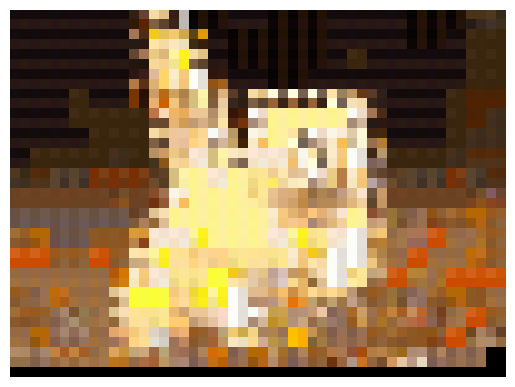

In [71]:
new_img = stylized_img[0] / (stylized_img[1] + 1)
new_img = new_img.astype(np.uint8)
rgb_image = new_img[:, :, ::-1]

plt.imshow(rgb_image)
plt.axis("off")

In [76]:
stylized_images = [stylized_img]

# **3. Plotting**

TypeError: Axes.imshow() missing 1 required positional argument: 'X'

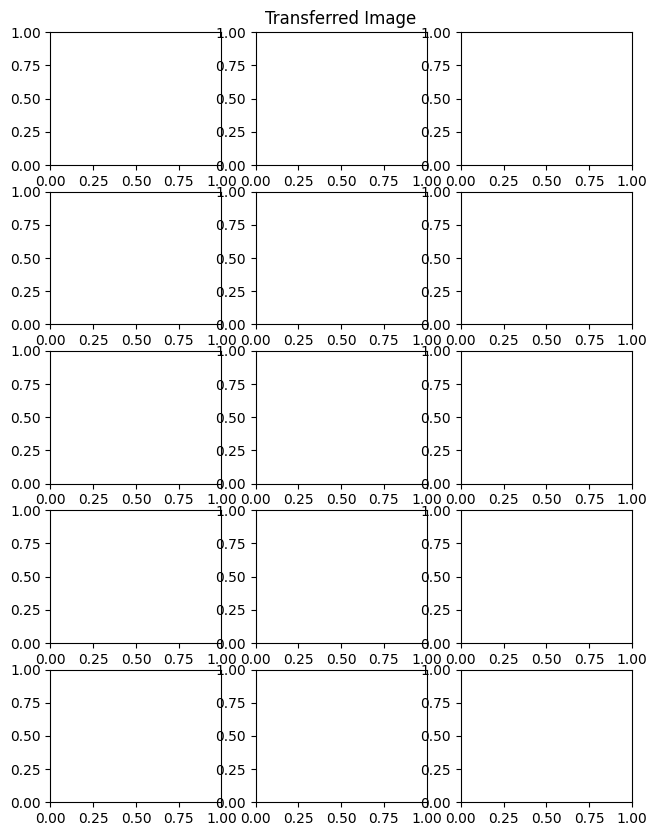

In [75]:
fig, axs = plt.subplots(5, 3, figsize=(7.5, 10))

# Naming columns
axs[0, 1].set_title("Original Image")
axs[0, 1].set_title("Style Image")
axs[0, 1].set_title("Transferred Image")


for i in range(1):
    axs[i, 0].imshow()
    axs[i, 1].imshow()
    axs[i, 2].imshow()

    # Turning off axis coords
    axs[i, 0].axis("off")
    axs[i, 1].axis("off")
    axs[i, 2].axis("off")

plt.axis('off')
plt.tight_layout()
plt.show()

In [79]:
!rm  /content/Screenshot from 2024-04-15 00-35-16.png

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
rm: cannot remove '/content/Screenshot': No such file or directory
rm: cannot remove 'from': No such file or directory
rm: cannot remove '2024-04-15': No such file or directory
rm: cannot remove '00-35-16.png': No such file or directory
